# Interview — Which ```user_id```?  

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from preprocessing import preprocessed_books_data, preprocessed_books_rating
from relevance import readability, relevance_word2vec, relevance_bert

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/iagodantasf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
cfg = yaml.safe_load(open("config.yaml"))

In [4]:
books_rating = preprocessed_books_rating(cfg)

In [5]:
books_data = preprocessed_books_data(cfg)

## Readability Analysis

Running in a small sample to estimate the running time:

In [6]:
# n_samples = 100000
# reviews_sample = books_rating['full_text'].iloc[:n_samples].values
# readability(reviews_sample)

In [7]:
readability_scores = readability(books_rating['full_text'].values)

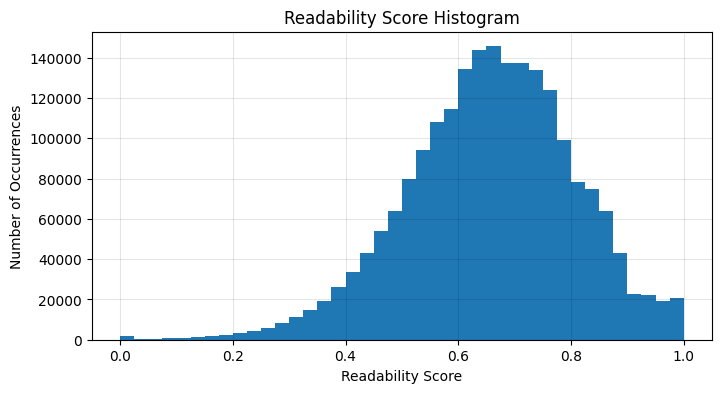

In [8]:
plt.figure(figsize=(8, 4))
plt.hist(readability_scores, bins=40)
plt.title("Readability Score Histogram")
plt.xlabel("Readability Score")
plt.ylabel("Number of Occurrences")
plt.grid(c='k', alpha=0.1)
plt.show()

In [9]:
books_rating['readability'] = readability_scores

In [10]:
books_rating.sort_values('readability')['full_text'].head().values

array(["Informative, &quot;reader friendly&quot;, insightful, comprehensive.. A Requiem For The American Village offers the reader a compelling and insightful series of essays by history professor Paul Conkin on a spectrum of American historical events and personalities. Conkin charts the transformation of the American nation from relatively homogenous, agriculturally based communities to multicultural cosmopolitan industrial and post-industrial cultures with concomitant subordination of an individual's sense of local autonomy to that of a national authority. From &quot;History As a Discipline&quot; to &quot;The Dilemmas of Cultural Pluralism&quot;, A Requiem For The American Village offers both students of American history and non-specialist general readers seeking an historical grasp to contemporary political and culture trends an informative, &quot;reader friendly&quot; perspective.",
       "Scientific &quot;Outsiders &quot; vs. Sensational Speculators. Traditional archaeology is b

In [11]:
books_rating.sort_values('readability')['full_text'].tail().values

array(['Great book!. Sue keeps you in suspense until the very end. If you love who-done-it books, this is the book for you.',
       "Robotech fan here!. Very good story line! VERY well written. If you're a Robotech fan buy and read this!!",
       'Good read for Bird fans. My 12 year old son enjoyed this book about the life of Larry Bird. I purchased this book for a very low price & it was money well spent. This book will stay on his shelf for years to come.',
       'Great product. THANKS! ,, ` 20 stars! ` ,, THANKS ! ,, ` 20 stars! ` ,, THANKS! ,, `',
       'Great Read. My son loved this book. He does not like to read thick books, but he loved this one. If you know a baseball fan in your family, this is a great book.'],
      dtype=object)

## Relevance Analysis

## Using BERT

In [12]:
books_rating.groupby('title')['user_id'].count().sort_values().reset_index().tail()

,title,user_id
205675,The Hobbit or There and Back Again,3496
205676,"The Hobbitt, or there and back again; illustra...",3548
205677,The Hobbit There and Back Again,3561
205678,The Hobbit,3562
205679,Harry Potter and The Sorcerer's Stone,3639


In [13]:
title = 'Harry Potter and The Sorcerer\'s Stone'

In [14]:
description = books_data.query("title == @title")['description'].values[0]
description

"Celebrate 20 years of Harry Potter magic! Harry Potter has never even heard of Hogwarts when the letters start dropping on the doormat at number four, Privet Drive. Addressed in green ink on yellowish parchment with a purple seal, they are swiftly confiscated by his grisly aunt and uncle. Then, on Harry's eleventh birthday, a great beetle-eyed giant of a man called Rubeus Hagrid bursts in with some astonishing news: Harry Potter is a wizard, and he has a place at Hogwarts School of Witchcraft and Wizardry. An incredible adventure is about to begin!These new editions of the classic and internationally bestselling, multi-award-winning series feature instantly pick-up-able new jackets by Jonny Duddle, with huge child appeal, to bring Harry Potter to the next generation of readers. It's time to PASS THE MAGIC ON ..."

Running in a small sample to estimate the running time:

In [15]:
# n_samples = 100
# _reviews = books_rating.query("title == @title")['full_text'].iloc[:n_samples].values
# relevance_bert(_reviews, description)

In [16]:
title_rating = books_rating.query("title == @title").copy()

In [17]:
relevance_scores_bert = relevance_bert(
    title_rating['full_text'].values,
    description,
)

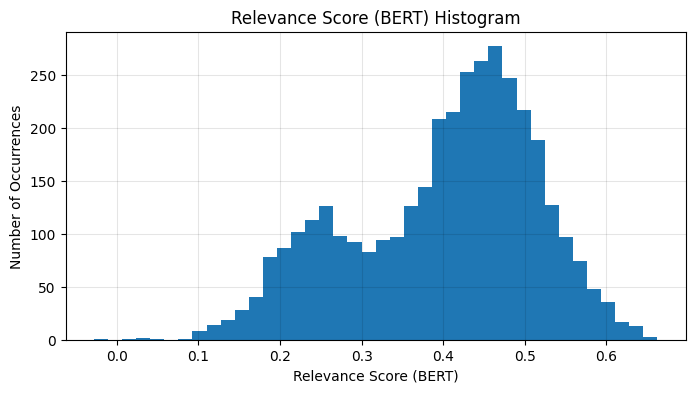

In [18]:
plt.figure(figsize=(8, 4))
plt.hist(relevance_scores_bert, bins=40)
plt.title("Relevance Score (BERT) Histogram")
plt.xlabel("Relevance Score (BERT)")
plt.ylabel("Number of Occurrences")
plt.grid(c='k', alpha=0.1)
plt.show()

In [19]:
title_rating['relevance_bert'] = relevance_scores_bert

In [20]:
title_rating.sort_values('relevance_bert')['full_text'].head().to_list()

['Auch in deutsch ausgezeichnet. F&uuml;r alle, die sich das Kind in sich bewahrt haben, ein Vergn&uuml;gen zu lesen.',
 'Bueno. Es un buen libro. Es entretenido y tiene recursos realmente interesantes. Rowlind demuestra mucha frescura y creatividad. Me gust&oacute;. Igualmente no creo que sea para para escribir cuatro o cinco libro m&aacute;s... no s&eacute; por cu&aacute;l va ahora.',
 "Screw this. Don't ask me to waste my time and not be able to exit this till you get a response. Here it is.",
 'In night dark. I did not not some of the part because it had kill in it but I really enjoyed this story.',
 'Missing Disk!. I was very upset with the product I received. After opening and beginning to listen to the CDs I realized that I had two copies of disk 2 and none of disk 3. This error should not have occurred. I would hope that a copy of disk 3 would be sent to me at no charge since I have already paid for the entire book. No one would buy a book if part of it was missing. It is the s

In [21]:
title_rating.sort_values('relevance_bert')['full_text'].tail().to_list()

["Rich Imagery and Wizardy. I've just finished re-reading this first Harry Potter book to refresh my memory in anticipation of the movie soon to be released. I was delighted all over again with the rich imagery and vivid imagination of the author. I can visualize the Hogwarts castle, flying broomsticks, witches, wizards, cauldrons, 3-headed monstrous dogs, owls that deliver the mail, unicorns, the invisible cloak, magic wands, dragons, Hagrid the hapless gamekeeper, Draco...Harry's mean-spirited adversary, staircases that move, paintings with disappearing subjects, feasts in the grand hall, spirited Quidditch matches, lessons in sorcery, alchemy, potions and spells.It's a whole new world for Harry, who until his 11th birthday didn't know that he was a world-famous wizard. After being orphaned as a baby, he was raised by his stingy aunt and uncle along with his piggy, selfish cousin, who were Muggles without any special powers. They had tried to deny and hide Harry's true calling, but t

### Using Word2Vec

Running in a small sample to estimate the running time:

In [ ]:
# n_samples = 100000
# reviews_sample = books_rating['full_text'].iloc[:n_samples].values
# relevance_word2vec(reviews_sample)

In [93]:
# relevance_scores = relevance_word2vec(books_rating['full_text'].values)

In [94]:
# pd.Series(relevance_scores).to_pickle('relecance_scores.pkl')

In [95]:
# min(relevance_scores), max(relevance_scores)

In [103]:
# for q in range(90, 101):
#     print(f"Quantile {q}: {np.quantile(relevance_scores, q/100):.2f}")

In [104]:
# relevance_scores_norm = (relevance_scores - min(relevance_scores)) / (max(relevance_scores) - min(relevance_scores))

In [105]:
# plt.figure(figsize=(8, 4))
# plt.hist(relevance_scores_norm, bins=40)
# plt.title("Relevance Score Histogram")
# plt.xlabel("Relevance Score")
# plt.ylabel("Number of Occurrences")
# plt.grid(c='k', alpha=0.1)
# plt.show()

In [106]:
# books_rating['relevance'] = relevance_scores_norm

In [107]:
# mean_relevance_by_user_id = (
#     books_rating
#     .groupby('user_id')
#     ['relevance']
#     .mean()
#     .sort_values()
# )
# mean_relevance_by_user_id

In [108]:
# books_rating.query("user_id == 'A2EEKPWCW8GX5R'")

In [109]:
# books_rating['full_text_len'] = books_rating['full_text'].str.len()

In [110]:
# books_rating.sort_values('relevance').head(10)

In [111]:
# books_rating.sort_values('relevance').tail(10)

In [112]:
# books_rating.loc[1872264, 'full_text']

In [113]:
# books_rating.loc[1200452, 'full_text']

In [55]:
# books_rating['relevance_div_len'] = books_rating['relevance'] / books_rating['full_text_len']

In [56]:
# books_rating.sort_values('relevance_div_len').tail(20)